In [1]:
import scipy.io
import scipy.misc
from scipy import optimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm #Used to display images in a specific colormap
import random

%matplotlib inline

In [2]:
mat = scipy.io.loadmat("ex3data1.mat")

In [3]:
X,y = mat["X"], mat["y"].ravel()

In [4]:
X.shape

(5000, 400)

In [5]:
X[0].shape

(400,)

In [6]:
def plotImage(image):
    width, height = 20,20
    return image.reshape(width,height).T

In [7]:
def displayData(indices_to_display = None):
    """
    Function that picks 100 random rows from X, creates a 20x20 image from each,
    then stitches them together into a 10x10 grid of images, and shows it.
    """
    width, height = 20, 20
    nrows, ncols = 10, 10 # we want 100 digits to be displayed
    if not indices_to_display:
        indices_to_display = random.sample(range(X.shape[0]), nrows*ncols) # take random sample of 100 digits
        
    big_picture = np.zeros((height*nrows,width*ncols))
    
    irow, icol = 0, 0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol  = 0
        iimg = plotImage(X[idx])
        big_picture[irow*height:irow*height+iimg.shape[0],icol*width:icol*width+iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize=(6,6))
    img = scipy.misc.toimage( big_picture )
    plt.imshow(img,cmap = cm.Greys_r)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


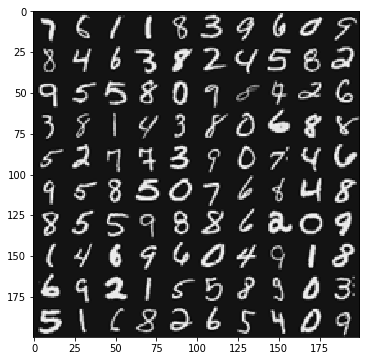

In [8]:
displayData()

In [9]:
# Parameter setup
input_layer_size = 20*20 # 400
num_labels = 10

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-1*x))

In [11]:
sigmoid(0)

0.5

Text(0.5,1,'Looks like a sigmoid function!')

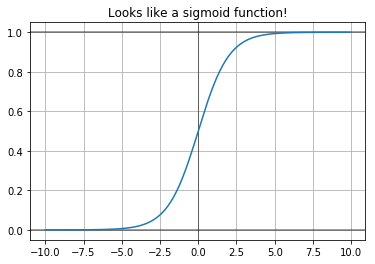

In [12]:
# Plot our sigmoid function to check whether hypothesis is working correctly
x_axis = np.arange(-10,10,0.1)
plt.axvline(0, c="black", linewidth=1, alpha=0.5)
plt.axhline(1, c="black", linewidth=1.5, alpha=0.5)
plt.axhline(0, c="black", linewidth=1.5, alpha=0.5)
plt.plot(x_axis, sigmoid(x_axis))
plt.grid(True)
plt.title("Looks like a sigmoid function!")

In [13]:
initial_theta = np.matrix("-2; -1; 1; 2")

In [14]:
#X_t = [ones(5,1) reshape(1:15,5,3)/10];
X_t = np.insert(np.matrix(np.arange(1,16)/10).reshape((5,3), order="F"),0,1,axis=1)
y_t = np.matrix("1;0;1;0;1")
lambda_t = 3

In [28]:
X_t

matrix([[1. , 0.1, 0.6, 1.1],
        [1. , 0.2, 0.7, 1.2],
        [1. , 0.3, 0.8, 1.3],
        [1. , 0.4, 0.9, 1.4],
        [1. , 0.5, 1. , 1.5]])

In [29]:
def lrCostFunction(theta, X,y, lmda):
    m = len(y)
    reg = (lmda/(2*m))*np.sum(np.power(theta[1:],2))
    J = (1.0/m)*np.sum(-y.T.dot(np.log(sigmoid(X.dot(theta))))-(1-y).T.dot(np.log(1-sigmoid(X.dot(theta)))))
    return J + reg

In [30]:
lrCostFunction(initial_theta,X_t,y_t,lambda_t)

2.534819396109744

In [31]:
def gradientFunctionReg(theta, X,y, lmda):
    m = len(y)
    mask = np.eye(len(theta)) # create our mask matrix which is the identity matrix with a 0 in the first value
    mask[0] = 0

    # Our mask is used because we only want regularization for values theta(1) to theta(n), excluding theta(0)
    # by multiplying the theta vector times our mask, we exclude the first theta (by multiplying times 0)!
    return 1/m * (np.dot((sigmoid(np.dot(X,theta))-y).T,X)).T + (lmda/m)*np.dot(mask, theta)

In [32]:
gradientFunctionReg(initial_theta,X_t,y_t,lambda_t)

matrix([[ 0.14656137],
        [-0.54855841],
        [ 0.72472227],
        [ 1.39800296]])

In [58]:
def oneVsAll(X,y,num_labels, lmda):
    m,n = np.shape(X)
    all_theta = np.zeros((num_labels,n+1))
    initial_theta = np.zeros((n+1,1))
    
    X = np.insert(X,0,1,axis=1)
    for i in range(0, 10):
        label = 10 if i == 0 else i
        result = optimize.fmin_cg(f=lrCostFunction, x0=initial_theta, args=(X,(y==label).astype(int),lmda), fprime=gradientFunctionReg, disp=False)
        all_theta[i, :] = result[0]
    return all_theta

In [59]:
all_theta = oneVsAll(X,y,num_labels,0.1)

In [60]:
def predictOneVsAll(theta,X):
    m = X.shape[0]
    num_labels = theta.shape[0]
    
    p = np.zeros((m,1))
    
    X = np.insert(X,0,1,axis=1)
    
    p = np.argmax(sigmoid(X.dot(theta.T)),axis=1)
    p[p==0] = 10
    return p

In [61]:
pred = predictOneVsAll(all_theta, X)
print("Accuracy: {0:8.2f}%".format(np.mean(pred==y)*100))

Accuracy:    10.00%
